## Загрузка библиотек и данных


In [1]:
#Загружаем библиотеки:

#pandas -  для обработки и анализа структурированных данных.
#numpy - для работы с многомерными массивами и матрицами (статистика, вычисления).
#matplotlib - для визуализации данных двумерной и трёхмерной графикой.
#seaborn - для статистической визуализации (построение графиков).

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Загружаем данные (файл "X_bp.xlsx")

df_xbp=pd.read_excel('X_bp.xlsx')

# Проверяем загруженные данные. Выводим первые пять строк

df_xbp.head(5)

,index,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [3]:
#Загружаем данные (файл "X_nup") 
df_xnup=pd.read_excel('X_nup.xlsx')

# Проверяем загруженные данные. Выводим первые пять строк

df_xnup.head(5)

,index,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.0,57.0
1,1,0,4.0,60.0
2,2,0,4.0,70.0
3,3,0,5.0,47.0
4,4,0,5.0,57.0


In [4]:
#Упростим таблицы заменив индекс

df_xbp=df_xbp.set_index('index')
df_xnup=df_xnup.set_index('index')


In [297]:
# Объеденим тыаблицы по индексу и введим первые пять строк объедененной таблицы

df_join=df_xbp.join(df_xnup, how = 'inner')

df_join.head(5).T

index,0,1,2,3,4
Соотношение матрица-наполнитель,1.857143,1.857143,1.857143,1.857143,2.771331
"Плотность, кг/м3",2030.000000,2030.000000,2030.000000,2030.000000,2030.000000
"модуль упругости, ГПа",738.736842,738.736842,738.736842,738.736842,753.000000
"Количество отвердителя, м.%",30.000000,50.000000,49.900000,129.000000,111.860000
"Содержание эпоксидных групп,%_2",22.267857,23.750000,33.000000,21.250000,22.267857
"Температура вспышки, С_2",100.000000,284.615385,284.615385,300.000000,284.615385
"Поверхностная плотность, г/м2",210.000000,210.000000,210.000000,210.000000,210.000000
"Модуль упругости при растяжении, ГПа",70.000000,70.000000,70.000000,70.000000,70.000000
"Прочность при растяжении, МПа",3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
"Потребление смолы, г/м2",220.000000,220.000000,220.000000,220.000000,220.000000


## Разведочный анализ данных (EDA)

In [298]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [299]:
# На основе выведенных данных, мы видим, что в наших данных отсутсвуют категориальные признаки, 
# тип данных наших (Dtype) признаков соответствует их смысловому содержанию,
# колонки (признаки) не содержат пропусков.

# для приятной визулизации, переменуем сттолбец 

rename_columns= {'модуль упругости, ГПа': 'Модуль упругости, ГПа'}

df_join.rename(columns=rename_columns, inplace=True)

### Описательные статитсики


In [300]:
# Выведем описательные статистики

df_join.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"Модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


In [9]:
# Мы видим, что средние значения наших признаков находятся в разных деапозонах, следовательно данные нужно будет нормализовать.
# Минимальное значения для наших признаков не должны быть отрицательными, что и наблюдается -
# в обратном случае, это были бы выбросы. 

### Гистограммы распределения каждой переменной 

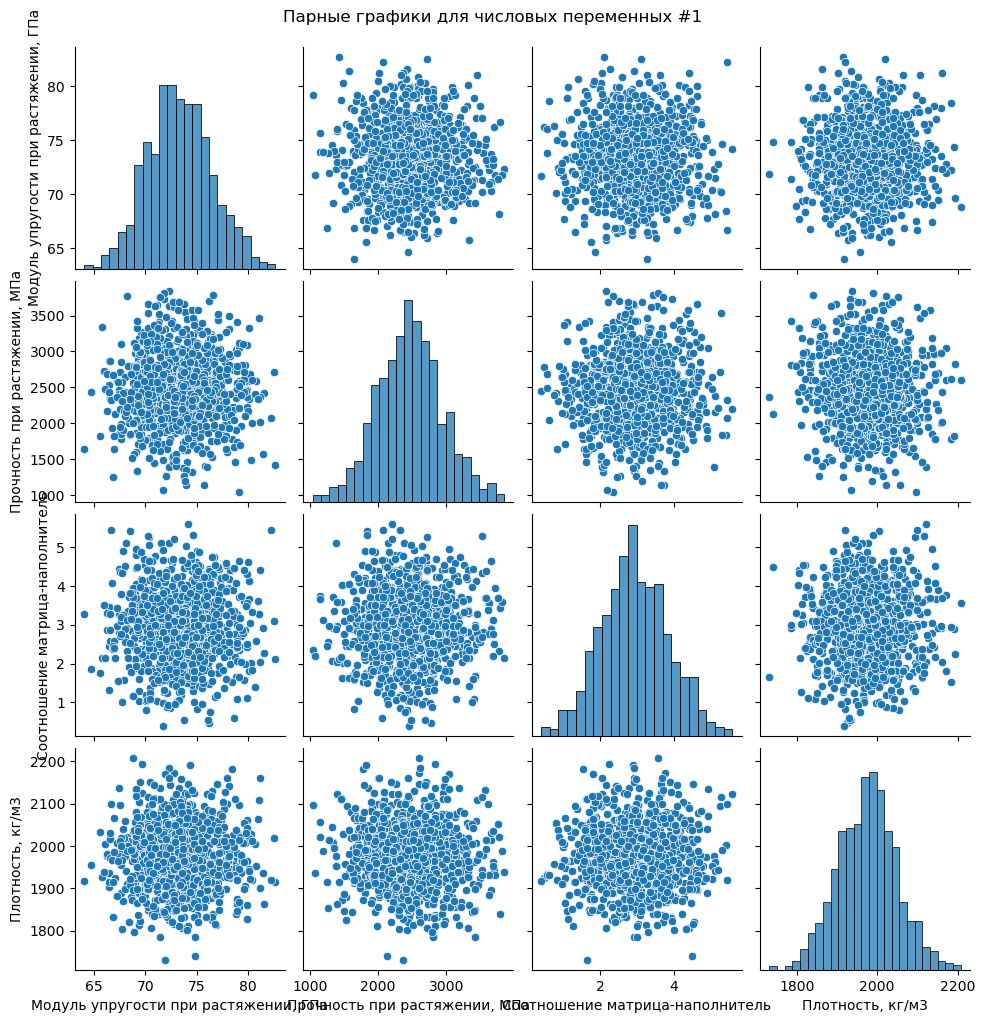

In [10]:
# Построим парные графики #1
sns.pairplot(df_join[[
         'Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа',           
    'Соотношение матрица-наполнитель','Плотность, кг/м3', 
                       ]])
plt.suptitle('Парные графики для числовых переменных #1', y=1.02)

plt.show()

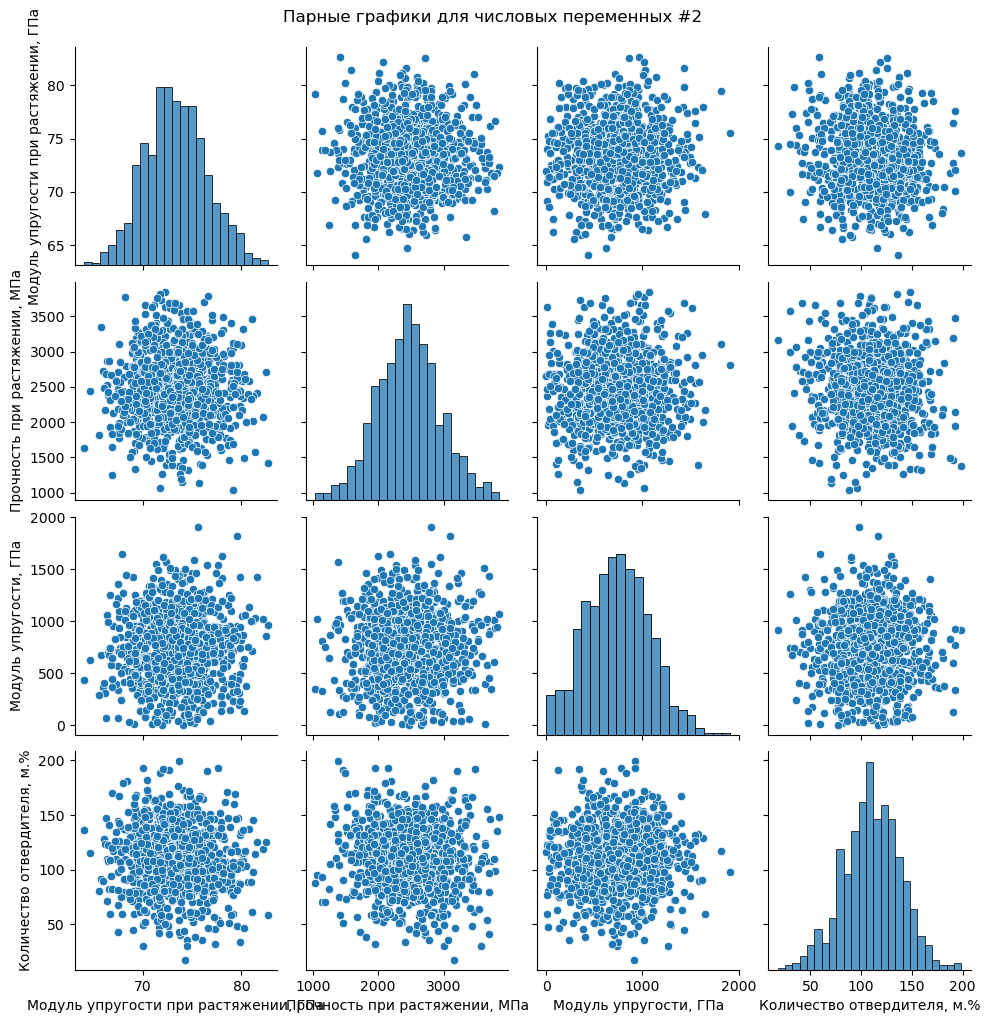

In [11]:
# Построим парные графики #2
sns.pairplot(df_join[[
         'Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа',           
    'Модуль упругости, ГПа', 'Количество отвердителя, м.%', 
                       ]])
plt.suptitle('Парные графики для числовых переменных #2', y=1.02)

plt.show()



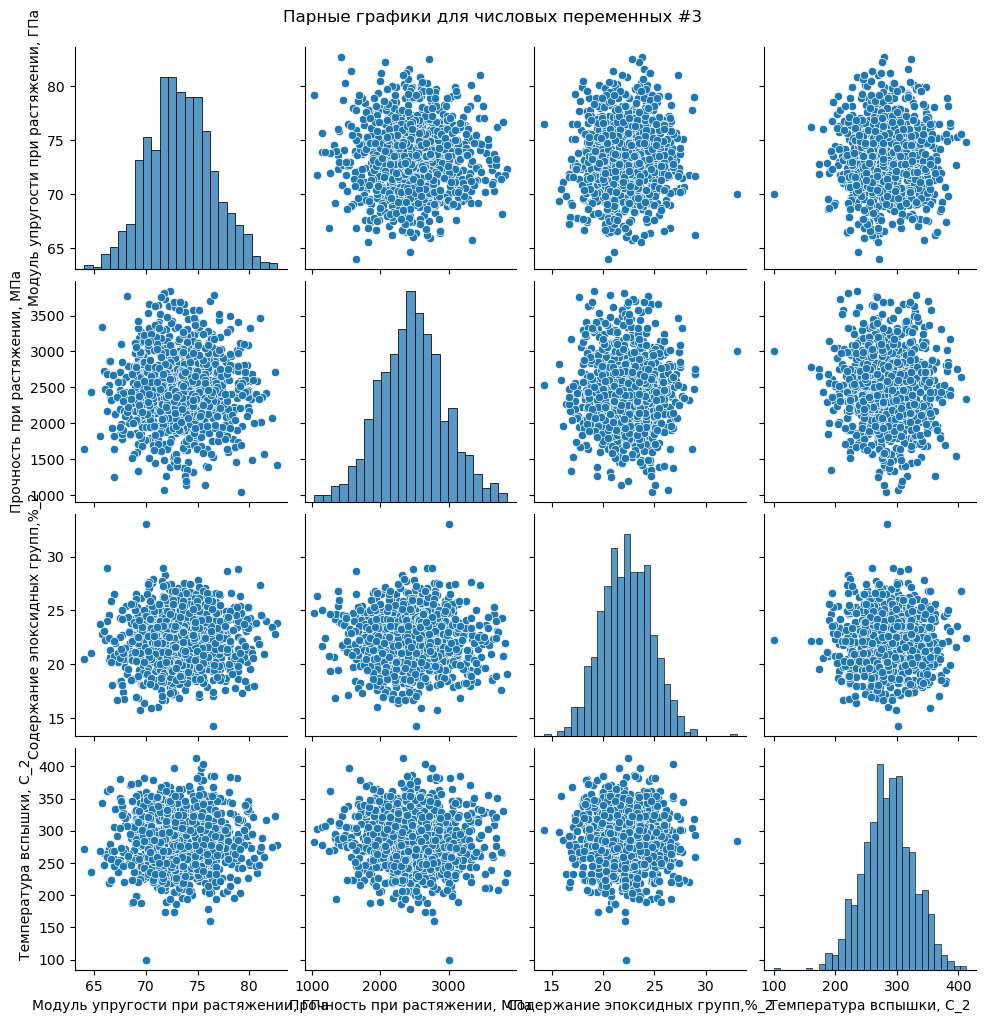

In [12]:
# Построим парные графики #3
sns.pairplot(df_join[[
         'Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа',           
   'Содержание эпоксидных групп,%_2','Температура вспышки, С_2', 
                       ]])
plt.suptitle('Парные графики для числовых переменных #3', y=1.02)

plt.show()





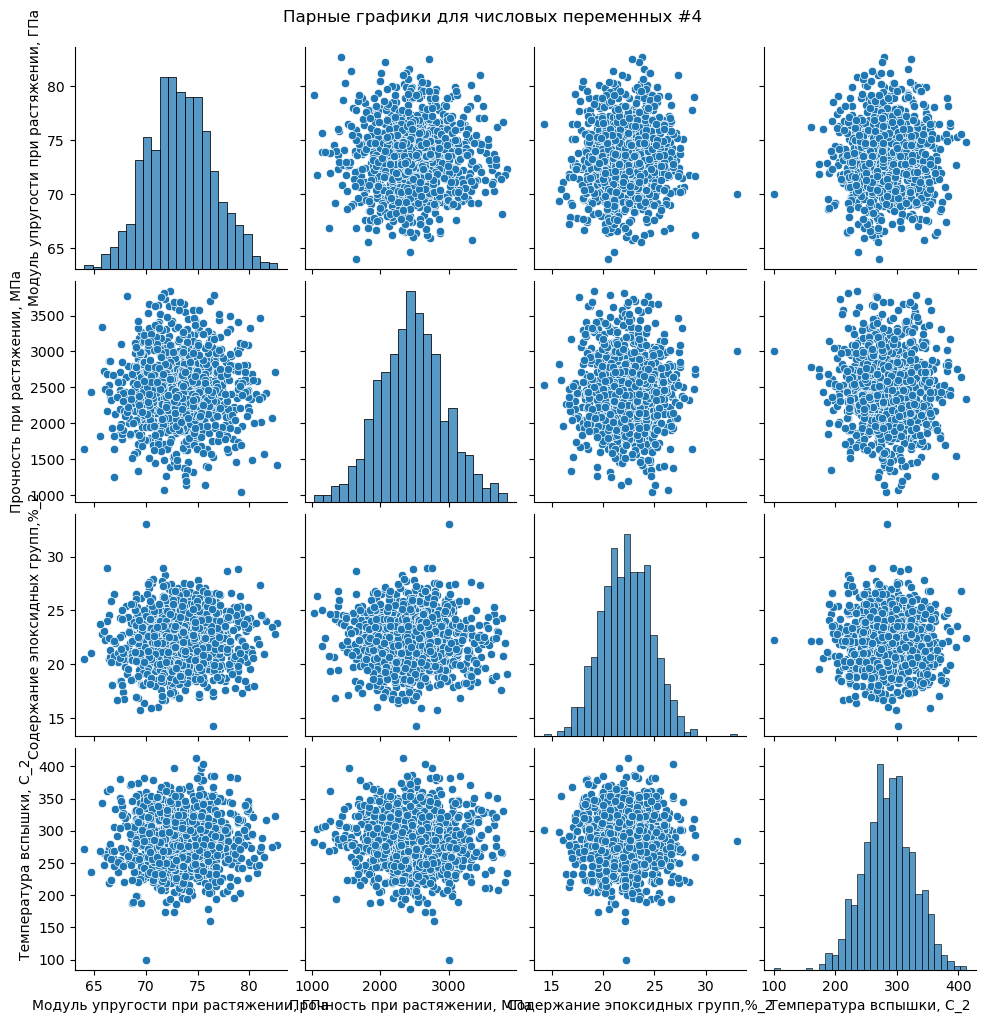

In [13]:
# Построим парные графики #4
sns.pairplot(df_join[[
         'Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа',           
   'Содержание эпоксидных групп,%_2','Температура вспышки, С_2', 
                       ]])
plt.suptitle('Парные графики для числовых переменных #4', y=1.02)

plt.show()




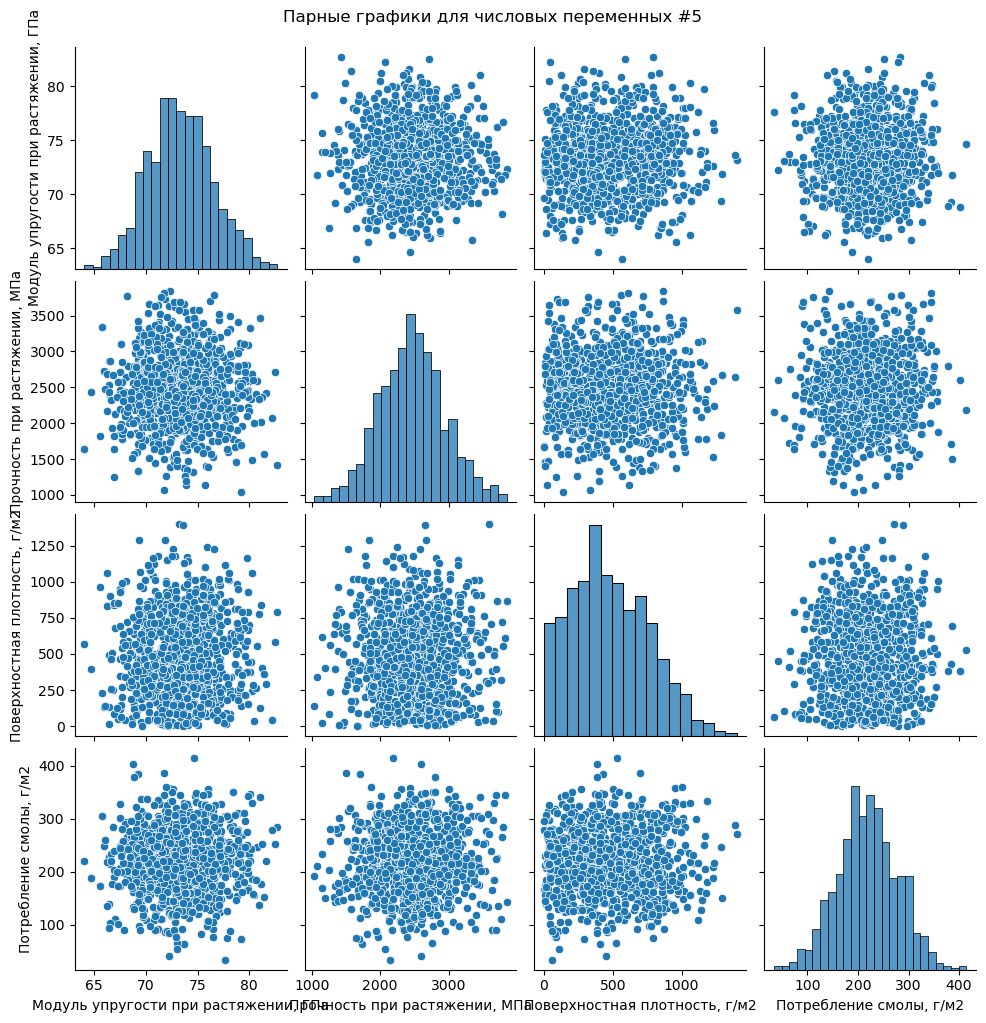

In [14]:
# Построим парные графики #5
sns.pairplot(df_join[[
         'Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа',           
   'Поверхностная плотность, г/м2','Потребление смолы, г/м2', 
                       ]])
plt.suptitle('Парные графики для числовых переменных #5', y=1.02)

plt.show()


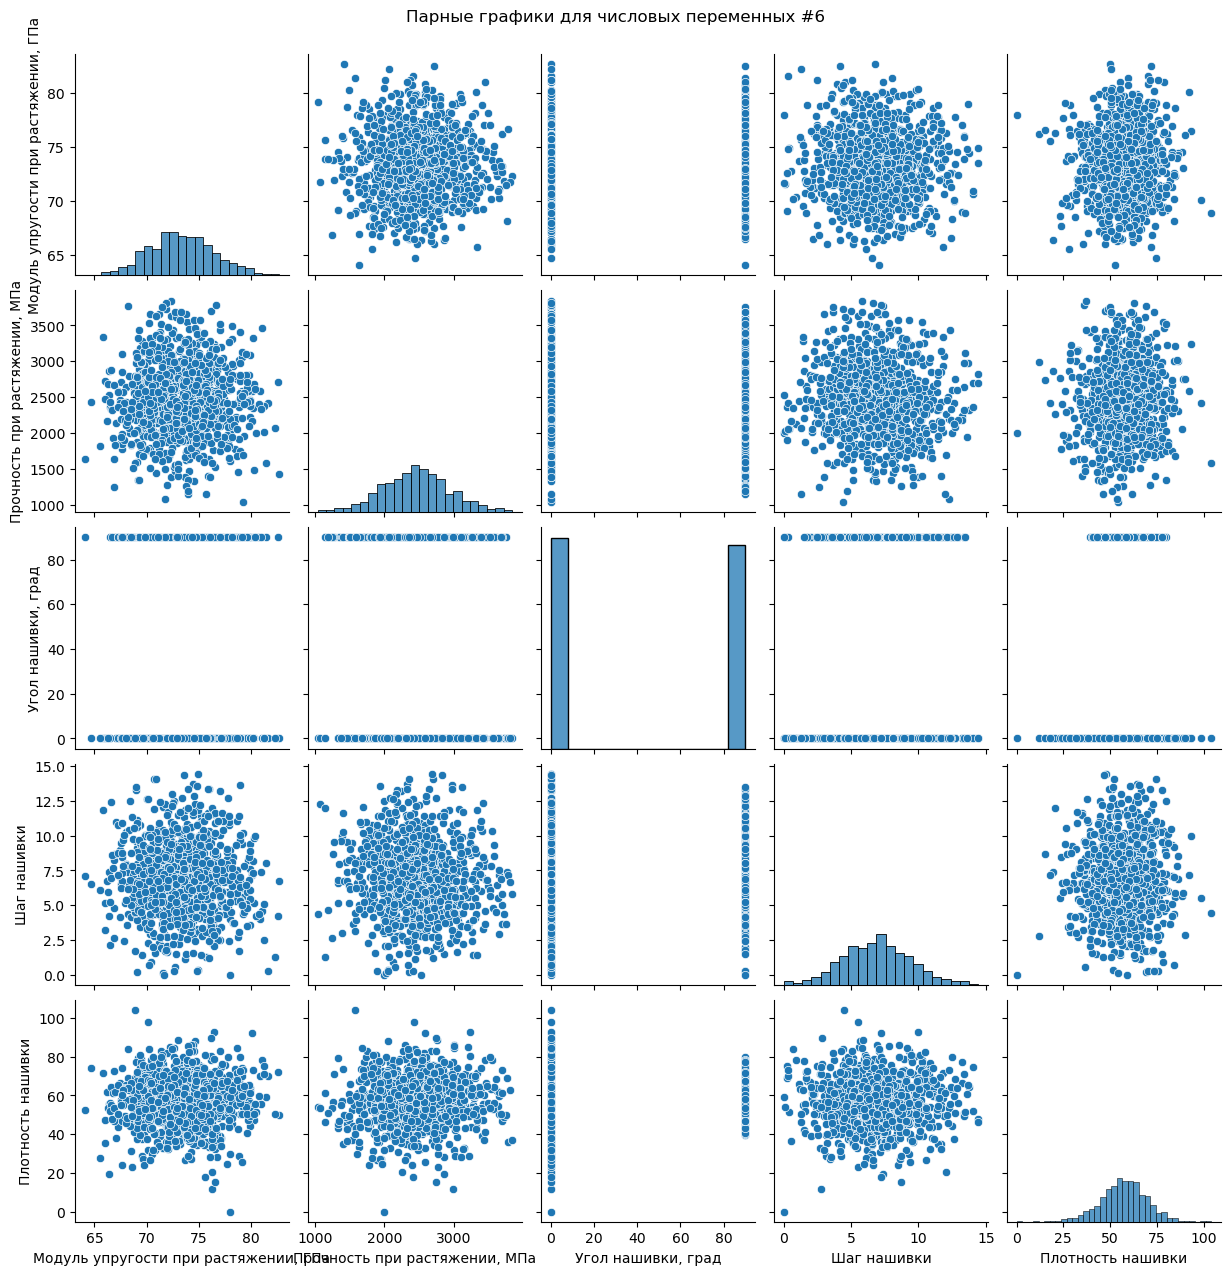

In [15]:
# Построим парные графики #6
sns.pairplot(df_join[[
         'Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа',           
   'Угол нашивки, град','Шаг нашивки', 'Плотность нашивки',
                       ]])
plt.suptitle('Парные графики для числовых переменных #6', y=1.02)

plt.show()

In [16]:
# На основе вышеприведенных гистрогам, мы видим, что наши дланные распределены нормально, кроме 
# столбца "Угол нашивки" - имеет всего два значения и столбец "Поверхностная плотность" - данные смещены влево. 

# также видно облачный тип распределения данных и отсутсвия корреляции, как между признаками 
# так и между признаками и таргетом. 

# Облачное распределение означает, что они имеют сложные зависимости и 
# могут быть подвержены шуму. В таких случаях стоит рассмотреть несколько моделей, которые хорошо справляются с 
# такими задачами: "Случайный лес", "Градиентный бустинг" и др. 

### Матрица корреляции (тепловая матица)

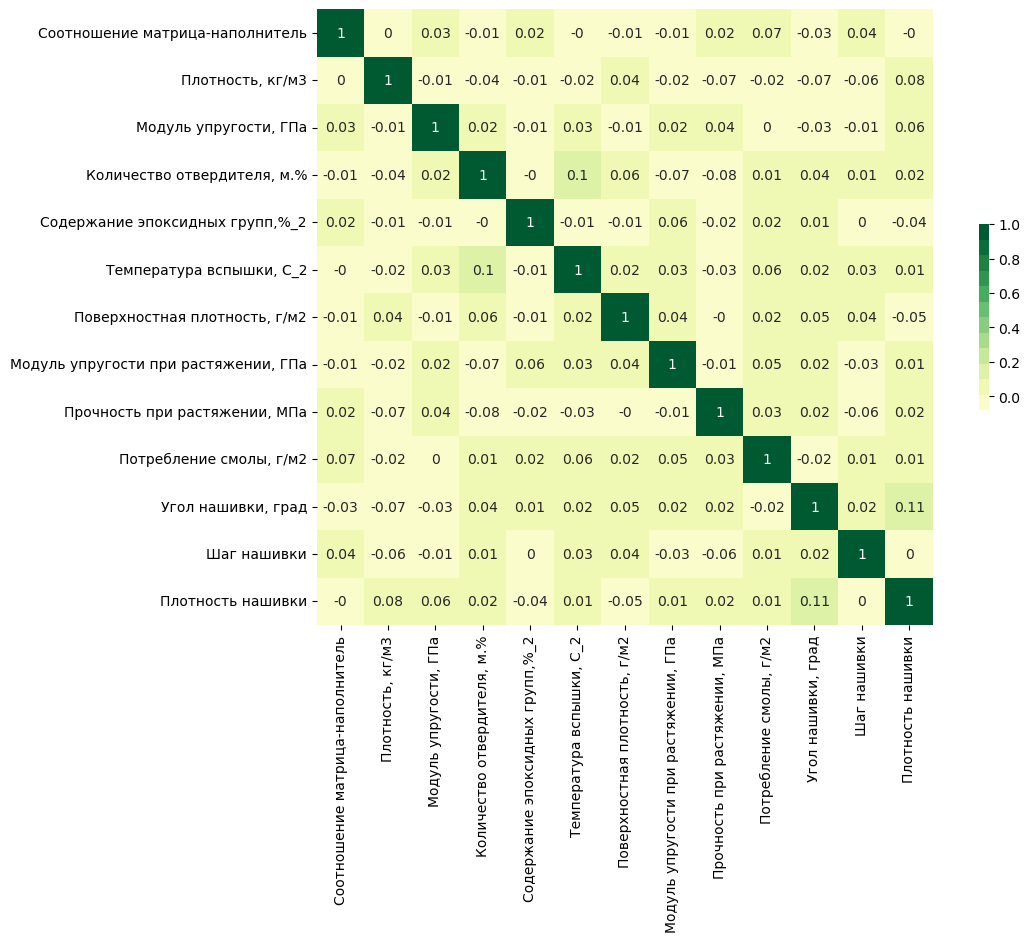

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    data=df_join.corr().round(2),
    cmap= sns.color_palette("YlGn", n_colors=12),
    cbar_kws={"fraction": 0.01},
    square=True,
    annot=True,
);

In [18]:
# Наш таргет не коррелирует с признаками, что не очень хорошо для задачи регрессии.
# Признаки не коррелируют между собой, что позволяет их всех сохрнаить для машинного обучения 
# на данном этапе. 

### Ящик с усами

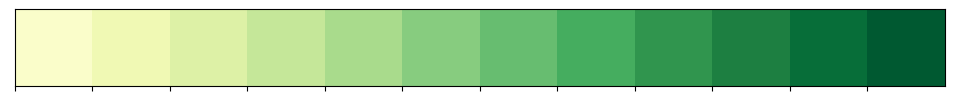

In [19]:
# Загрузим цветовое решение
palette = sns.color_palette("YlGn", n_colors=12)

sns.palplot(palette)
plt.show()

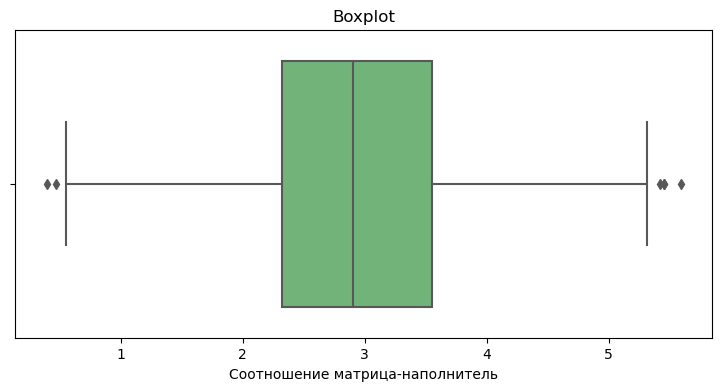

In [20]:
# Ящик с усами - соотношение матрица-наполнитель
plt.figure(figsize=(9, 4))
sns.boxplot(x=df_join['Соотношение матрица-наполнитель'], color=palette[6])
plt.title("Boxplot")
plt.xlabel('Соотношение матрица-наполнитель')
plt.show()

In [21]:
# Точки за пределами усов обычно считаются "выбросами" или аномальными значениями. 
# Эти значения отклоняются от основного распределения данных. На 'boxplot' видны выбросы, два слева и три справа.

In [22]:
# Вычисление IQR
Q1 = df_join['Соотношение матрица-наполнитель'].quantile(0.25)
Q3 = df_join['Соотношение матрица-наполнитель'].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов (вне диапазона 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_join_iqr = df_join[(df_join['Соотношение матрица-наполнитель'] >= lower_bound) & (df_join['Соотношение матрица-наполнитель'] <= upper_bound)]


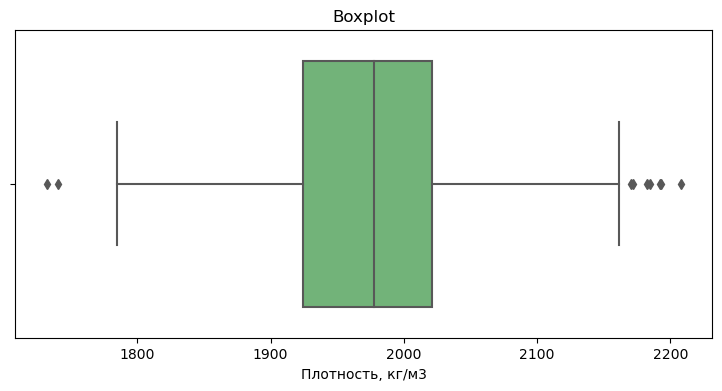

In [23]:
# Проведем такую же процедуру для таргетов и признаков.

plt.figure(figsize=(9, 4))
sns.boxplot(x=df_join_iqr['Плотность, кг/м3'], color=palette[6])
plt.title("Boxplot")
plt.xlabel('Плотность, кг/м3')
plt.show()

In [24]:
# Вычисление IQR
Q1 = df_join['Плотность, кг/м3'].quantile(0.25)
Q3 = df_join['Плотность, кг/м3'].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов (вне диапазона 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_join_iqr_2 = df_join_iqr[(df_join_iqr['Плотность, кг/м3'] >= lower_bound) & (df_join_iqr['Плотность, кг/м3'] <= upper_bound)]


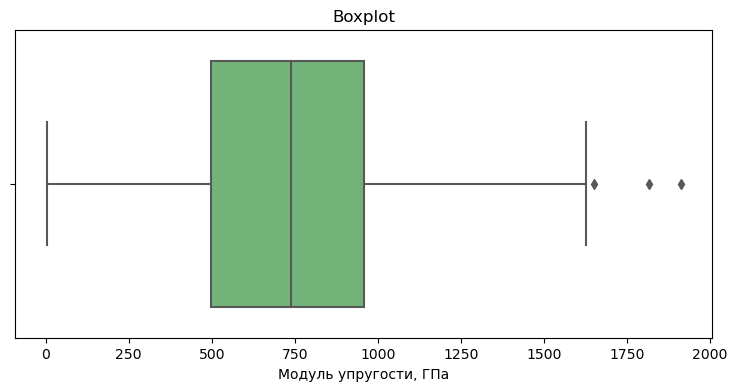

In [25]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df_join_iqr['Модуль упругости, ГПа'], color=palette[6])
plt.title("Boxplot")
plt.xlabel('Модуль упругости, ГПа')
plt.show()

In [26]:
# Вычисление IQR
Q1 = df_join['Модуль упругости, ГПа'].quantile(0.25)
Q3 = df_join['Модуль упругости, ГПа'].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов (вне диапазона 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_join_iqr_3 = df_join_iqr_2[(df_join_iqr_2['Модуль упругости, ГПа'] >= lower_bound) & (df_join_iqr_2['Модуль упругости, ГПа'] <= upper_bound)]


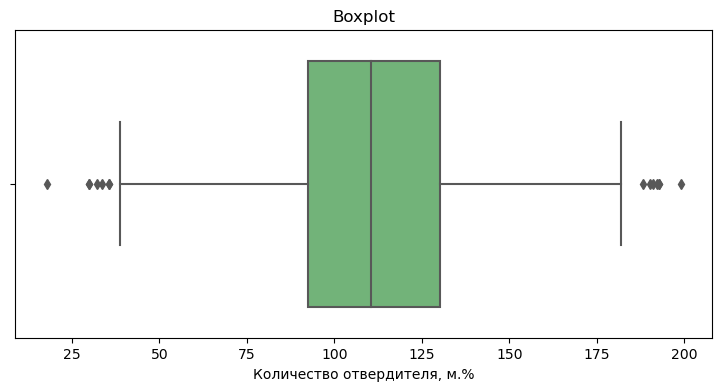

In [27]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df_join_iqr_3['Количество отвердителя, м.%'], color=palette[6])
plt.title("Boxplot")
plt.xlabel('Количество отвердителя, м.%')
plt.show()

In [28]:
# Вычисление IQR
Q1 = df_join['Количество отвердителя, м.%'].quantile(0.25)
Q3 = df_join['Количество отвердителя, м.%'].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов (вне диапазона 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_join_iqr_4 = df_join_iqr_3[(df_join_iqr_3['Количество отвердителя, м.%'] >= lower_bound) & (df_join_iqr_3['Количество отвердителя, м.%'] <= upper_bound)]


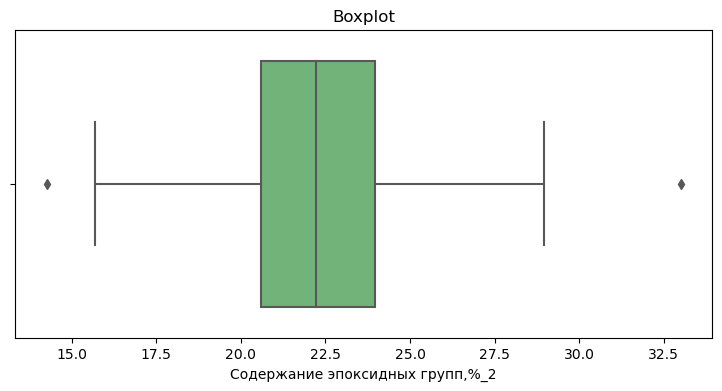

In [29]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df_join_iqr_4['Содержание эпоксидных групп,%_2'], color=palette[6])
plt.title("Boxplot")
plt.xlabel('Содержание эпоксидных групп,%_2')
plt.show()

In [30]:
# Вычисление IQR
Q1 = df_join['Содержание эпоксидных групп,%_2'].quantile(0.25)
Q3 = df_join['Содержание эпоксидных групп,%_2'].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов (вне диапазона 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_join_iqr_5 = df_join_iqr_4[(df_join_iqr_4['Содержание эпоксидных групп,%_2'] >= lower_bound) & (df_join_iqr_4['Содержание эпоксидных групп,%_2'] <= upper_bound)]

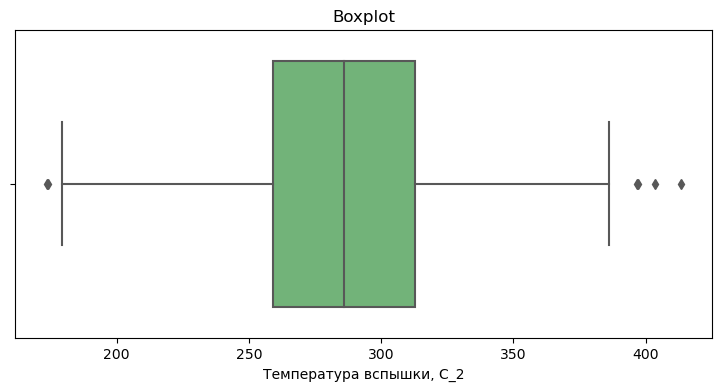

In [31]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df_join_iqr_5['Температура вспышки, С_2'], color=palette[6])
plt.title("Boxplot")
plt.xlabel('Температура вспышки, С_2')
plt.show()

In [32]:
# Вычисление IQR
Q1 = df_join['Температура вспышки, С_2'].quantile(0.25)
Q3 = df_join['Температура вспышки, С_2'].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов (вне диапазона 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_join_iqr_6 = df_join_iqr_5[(df_join_iqr_5['Температура вспышки, С_2'] >= lower_bound) & (df_join_iqr_5['Температура вспышки, С_2'] <= upper_bound)]

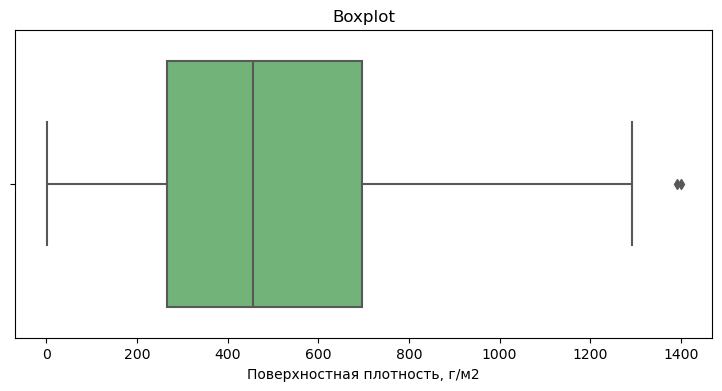

In [33]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df_join_iqr_6['Поверхностная плотность, г/м2'], color=palette[6])
plt.title("Boxplot")
plt.xlabel('Поверхностная плотность, г/м2')
plt.show()

In [34]:
# Вычисление IQR
Q1 = df_join['Поверхностная плотность, г/м2'].quantile(0.25)
Q3 = df_join['Поверхностная плотность, г/м2'].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов (вне диапазона 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_join_iqr_7 = df_join_iqr_6[(df_join_iqr_6['Поверхностная плотность, г/м2'] >= lower_bound) & (df_join_iqr_6['Поверхностная плотность, г/м2'] <= upper_bound)]

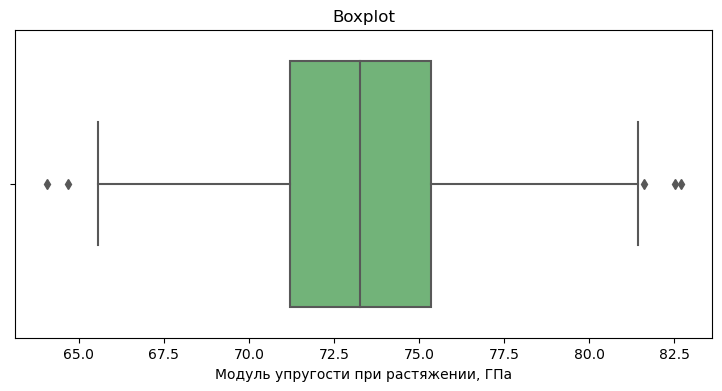

In [296]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df_join_iqr_7['Модуль упругости при растяжении, ГПа'], color=palette[6])
plt.title("Boxplot")
plt.xlabel('Модуль упругости при растяжении, ГПа')
plt.show()

In [301]:
# Вычисление IQR
Q1 = df_join['Модуль упругости при растяжении, ГПа'].quantile(0.25)
Q3 = df_join['Модуль упругости при растяжении, ГПа'].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов (вне диапазона 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_join_iqr_8 = df_join_iqr_7[(df_join_iqr_7['Модуль упругости при растяжении, ГПа'] >= lower_bound) & (df_join_iqr_7['Модуль упругости при растяжении, ГПа'] <= upper_bound)]


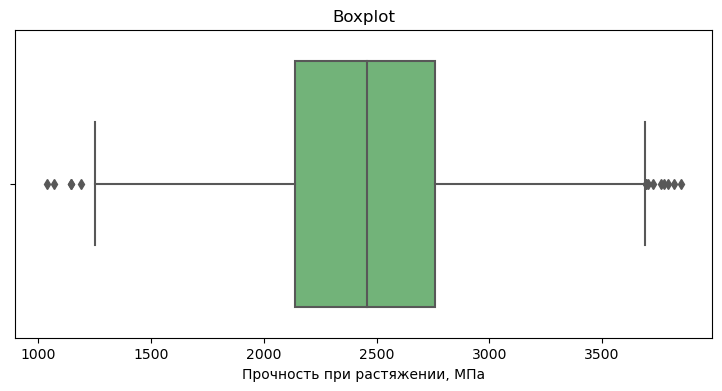

In [37]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df_join_iqr_7['Прочность при растяжении, МПа'], color=palette[6])
plt.title("Boxplot")
plt.xlabel('Прочность при растяжении, МПа')
plt.show()

In [38]:
# Вычисление IQR
Q1 = df_join['Прочность при растяжении, МПа'].quantile(0.25)
Q3 = df_join['Прочность при растяжении, МПа'].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов (вне диапазона 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_join_iqr_9 = df_join_iqr_8[(df_join_iqr_8['Прочность при растяжении, МПа'] >= lower_bound) & (df_join_iqr_8['Прочность при растяжении, МПа'] <= upper_bound)]

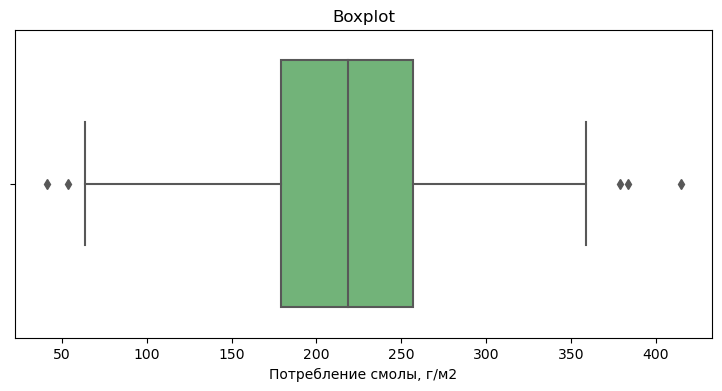

In [39]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df_join_iqr_9['Потребление смолы, г/м2'], color=palette[6])
plt.title("Boxplot")
plt.xlabel('Потребление смолы, г/м2')
plt.show()

In [40]:
# Вычисление IQR
Q1 = df_join['Потребление смолы, г/м2'].quantile(0.25)
Q3 = df_join['Потребление смолы, г/м2'].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов (вне диапазона 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_join_iqr_10 = df_join_iqr_9[(df_join_iqr_9['Потребление смолы, г/м2'] >= lower_bound) & (df_join_iqr_9['Потребление смолы, г/м2'] <= upper_bound)]

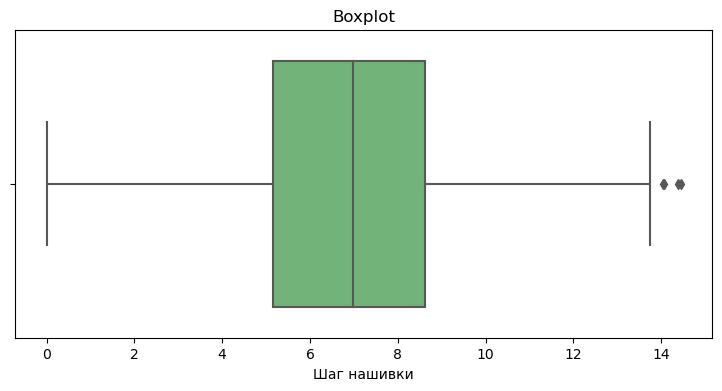

In [41]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df_join_iqr_10['Шаг нашивки'], color=palette[6])
plt.title("Boxplot")
plt.xlabel('Шаг нашивки')
plt.show()

In [42]:
# Вычисление IQR
Q1 = df_join['Шаг нашивки'].quantile(0.25)
Q3 = df_join['Шаг нашивки'].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов (вне диапазона 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_join_iqr_11 = df_join_iqr_10[(df_join_iqr_10['Шаг нашивки'] >= lower_bound) & (df_join_iqr_10['Шаг нашивки'] <= upper_bound)]

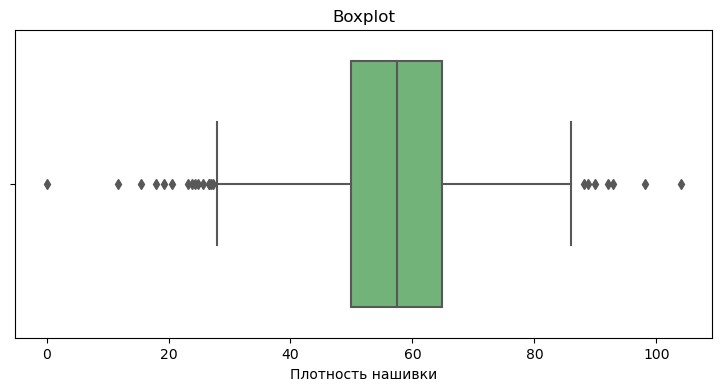

In [43]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df_join_iqr_11['Плотность нашивки'], color=palette[6])
plt.title("Boxplot")
plt.xlabel('Плотность нашивки')
plt.show()

In [44]:
# По переменной "Плотность нашивки", давольно много потенциальных выбросов, поэтому временно "отстраняем" ее от
# дальнейшей работы. 
# По гистограмме также можно сделать вывод, что переменная: "Угол нашивки" - практически не влияет на наш таргет,
# поэтому по ней не делаем ящик с усами и она также временно "отстраняется". 

In [45]:
df_join_iqr_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       957 non-null    float64
 1   Плотность, кг/м3                      957 non-null    float64
 2   Модуль упругости, ГПа                 957 non-null    float64
 3   Количество отвердителя, м.%           957 non-null    float64
 4   Содержание эпоксидных групп,%_2       957 non-null    float64
 5   Температура вспышки, С_2              957 non-null    float64
 6   Поверхностная плотность, г/м2         957 non-null    float64
 7   Модуль упругости при растяжении, ГПа  957 non-null    float64
 8   Прочность при растяжении, МПа         957 non-null    float64
 9   Потребление смолы, г/м2               957 non-null    float64
 10  Угол нашивки, град                    957 non-null    int64  
 11  Шаг нашивки       

In [46]:
df_join_iqr_11.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,957.0,2.927111,0.894195,0.547391,2.337851,2.906383,3.546415,5.314144
"Плотность, кг/м3",957.0,1973.976987,70.664733,1784.482245,1923.762595,1977.126504,2020.005530,2161.565216
"Модуль упругости, ГПа",957.0,738.167786,328.576772,2.436909,498.194241,737.592885,962.135964,1649.415706
"Количество отвердителя, м.%",957.0,110.704048,26.952437,38.668500,92.483619,110.738213,129.726055,181.828448
"Содержание эпоксидных групп,%_2",957.0,22.227193,2.391748,15.695894,20.582837,22.208465,23.962165,28.955094
"Температура вспышки, С_2",957.0,285.854819,39.358660,179.374391,259.141151,285.896812,312.742047,386.067992
"Поверхностная плотность, г/м2",957.0,483.461913,280.026945,0.603740,266.492473,456.908047,696.065453,1291.340115
"Модуль упругости при растяжении, ГПа",957.0,73.310548,3.062337,65.553336,71.217734,73.268805,75.336917,81.417126
"Прочность при растяжении, МПа",957.0,2465.935464,463.228121,1250.392802,2144.891733,2456.393368,2754.515879,3705.672523
"Потребление смолы, г/м2",957.0,217.834055,57.894491,63.685698,179.211987,218.448971,256.784428,359.052220


In [47]:
df_join.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"Модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


In [48]:
# Сравнительный анализ показал, что средние значения после удаления выбросов изменились незначительно. 

In [305]:
# Посчитаем потери данных после удаления выбросов:
print (f' Потеряли столбцов: {(1023-957)}')
print (f' Процент потерь: {((66*100)/1023)}')


 Потеряли столбцов: 66
 Процент потерь: 6.451612903225806


In [50]:
df_work=df_join_iqr_11.copy()
df_work.head(5).T

index,1,3,4,5,6
Соотношение матрица-наполнитель,1.857143,1.857143,2.771331,2.767918,2.569620
"Плотность, кг/м3",2030.000000,2030.000000,2030.000000,2000.000000,1910.000000
"Модуль упругости, ГПа",738.736842,738.736842,753.000000,748.000000,807.000000
"Количество отвердителя, м.%",50.000000,129.000000,111.860000,111.860000,111.860000
"Содержание эпоксидных групп,%_2",23.750000,21.250000,22.267857,22.267857,22.267857
"Температура вспышки, С_2",284.615385,300.000000,284.615385,284.615385,284.615385
"Поверхностная плотность, г/м2",210.000000,210.000000,210.000000,210.000000,210.000000
"Модуль упругости при растяжении, ГПа",70.000000,70.000000,70.000000,70.000000,70.000000
"Прочность при растяжении, МПа",3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
"Потребление смолы, г/м2",220.000000,220.000000,220.000000,220.000000,220.000000


##  Преоброзование данных (нормализация)

In [51]:
# Подгрузим библиотеку
from sklearn.preprocessing import MinMaxScaler 

# Обучим модель
minmax_scaler=MinMaxScaler()
norm_array=minmax_scaler.fit_transform(np.array(df_work.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'],axis=1)))
norm_array
df_work_norm=pd.DataFrame(data=norm_array, columns= ['Соотношение матрица-наполнитель',
    'Плотность, кг/м3',	
    'Модуль упругости, ГПа',	
    'Количество отвердителя, м.%',	
    'Содержание эпоксидных групп,%_2',	
    'Температура вспышки, С_2',	
    'Поверхностная плотность, г/м2',	                                            
    'Потребление смолы, г/м2',	
    'Угол нашивки, град',	
    'Шаг нашивки',	
  'Плотность нашивки'
       ])
# Посмотрим первые пять строк нормализованной матрицы 
df_work_norm.head(5).T
df_work_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  957 non-null    float64
 1   Плотность, кг/м3                 957 non-null    float64
 2   Модуль упругости, ГПа            957 non-null    float64
 3   Количество отвердителя, м.%      957 non-null    float64
 4   Содержание эпоксидных групп,%_2  957 non-null    float64
 5   Температура вспышки, С_2         957 non-null    float64
 6   Поверхностная плотность, г/м2    957 non-null    float64
 7   Потребление смолы, г/м2          957 non-null    float64
 8   Угол нашивки, град               957 non-null    float64
 9   Шаг нашивки                      957 non-null    float64
 10  Плотность нашивки                957 non-null    float64
dtypes: float64(11)
memory usage: 82.4 KB


## Модели прогноза

### 1 GradientBoostingRegressor

Коэффициент детерминации: -0.08459739309338521
Среднее абсолюьное отклонение: 2.5770935542238713
Среднее квадротичное отклонение: 10.539410880106582
Cross-Validation MSE Scores: [10.56401772 11.65132576  8.6749183  11.35717946  9.20425572]
Mean CV MSE Score: 10.29


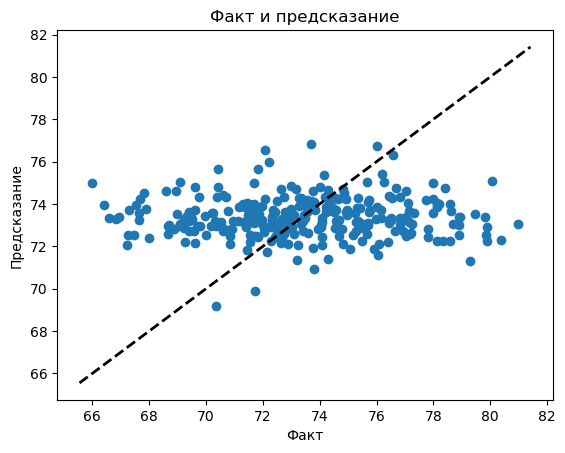

In [52]:
# Подгружаем библиотеки 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
# Метрики проверки качества модели
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.metrics import accuracy_score
# Градиентный бустинг
from sklearn.ensemble import GradientBoostingRegressor

# Присвоим значения
X = df_work_norm.drop(['Угол нашивки, град', 'Плотность нашивки'], axis=1)
y = np.array(df_work['Модуль упругости при растяжении, ГПа'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели XGBoost
model_1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Обучение модели
model_1.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model_1.predict(X_test)

# Оценка производительности модели
print(f'Коэффициент детерминации: {r2_score(y_test, y_pred)}')
print (f'Среднее абсолюьное отклонение: {mean_absolute_error(y_test, y_pred)}')
print (f'Среднее квадротичное отклонение: {mean_squared_error(y_test, y_pred)}')

# Кросс-валидация
cv_scores = cross_val_score(model_1, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE Scores: {-cv_scores}')
print(f'Mean CV MSE Score: {-np.mean(cv_scores):.2f}')

# Визуализация предсказанных значений против фактических
plt.scatter(y_test, y_pred)
plt.xlabel('Факт')
plt.ylabel('Предсказание')
plt.title('Факт и предсказание')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()


In [53]:
# Попробуем контролировать обобщающую способность такой модели!

from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Передадим в GridSearchCV

search = GridSearchCV(estimator=model_1, param_grid=param_grid, cv=5, 
                      scoring='neg_mean_squared_error',
                      verbose=10)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

print(f"Качество лучшей модели на финальном тесте: {search.score(X_test, y_test)}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START learning_rate=0.01, max_depth=3, min_samples_split=2.......
[CV 1/5; 1/27] END learning_rate=0.01, max_depth=3, min_samples_split=2;, score=-10.127 total time=   0.0s
[CV 2/5; 1/27] START learning_rate=0.01, max_depth=3, min_samples_split=2.......
[CV 2/5; 1/27] END learning_rate=0.01, max_depth=3, min_samples_split=2;, score=-8.193 total time=   0.0s
[CV 3/5; 1/27] START learning_rate=0.01, max_depth=3, min_samples_split=2.......
[CV 3/5; 1/27] END learning_rate=0.01, max_depth=3, min_samples_split=2;, score=-9.974 total time=   0.1s
[CV 4/5; 1/27] START learning_rate=0.01, max_depth=3, min_samples_split=2.......
[CV 4/5; 1/27] END learning_rate=0.01, max_depth=3, min_samples_split=2;, score=-9.168 total time=   0.0s
[CV 5/5; 1/27] START learning_rate=0.01, max_depth=3, min_samples_split=2.......
[CV 5/5; 1/27] END learning_rate=0.01, max_depth=3, min_samples_split=2;, score=-9.408 total time=   0.0s
[C

[CV 4/5; 9/27] END learning_rate=0.01, max_depth=5, min_samples_split=10;, score=-9.403 total time=   0.1s
[CV 5/5; 9/27] START learning_rate=0.01, max_depth=5, min_samples_split=10......
[CV 5/5; 9/27] END learning_rate=0.01, max_depth=5, min_samples_split=10;, score=-9.380 total time=   0.1s
[CV 1/5; 10/27] START learning_rate=0.1, max_depth=3, min_samples_split=2.......
[CV 1/5; 10/27] END learning_rate=0.1, max_depth=3, min_samples_split=2;, score=-11.518 total time=   0.0s
[CV 2/5; 10/27] START learning_rate=0.1, max_depth=3, min_samples_split=2.......
[CV 2/5; 10/27] END learning_rate=0.1, max_depth=3, min_samples_split=2;, score=-9.748 total time=   0.1s
[CV 3/5; 10/27] START learning_rate=0.1, max_depth=3, min_samples_split=2.......
[CV 3/5; 10/27] END learning_rate=0.1, max_depth=3, min_samples_split=2;, score=-11.323 total time=   0.0s
[CV 4/5; 10/27] START learning_rate=0.1, max_depth=3, min_samples_split=2.......
[CV 4/5; 10/27] END learning_rate=0.1, max_depth=3, min_sampl

[CV 3/5; 18/27] END learning_rate=0.1, max_depth=5, min_samples_split=10;, score=-11.627 total time=   0.1s
[CV 4/5; 18/27] START learning_rate=0.1, max_depth=5, min_samples_split=10......
[CV 4/5; 18/27] END learning_rate=0.1, max_depth=5, min_samples_split=10;, score=-11.103 total time=   0.1s
[CV 5/5; 18/27] START learning_rate=0.1, max_depth=5, min_samples_split=10......
[CV 5/5; 18/27] END learning_rate=0.1, max_depth=5, min_samples_split=10;, score=-10.382 total time=   0.1s
[CV 1/5; 19/27] START learning_rate=0.2, max_depth=3, min_samples_split=2.......
[CV 1/5; 19/27] END learning_rate=0.2, max_depth=3, min_samples_split=2;, score=-12.503 total time=   0.0s
[CV 2/5; 19/27] START learning_rate=0.2, max_depth=3, min_samples_split=2.......
[CV 2/5; 19/27] END learning_rate=0.2, max_depth=3, min_samples_split=2;, score=-10.986 total time=   0.0s
[CV 3/5; 19/27] START learning_rate=0.2, max_depth=3, min_samples_split=2.......
[CV 3/5; 19/27] END learning_rate=0.2, max_depth=3, min_s

[CV 2/5; 27/27] END learning_rate=0.2, max_depth=5, min_samples_split=10;, score=-11.123 total time=   0.1s
[CV 3/5; 27/27] START learning_rate=0.2, max_depth=5, min_samples_split=10......
[CV 3/5; 27/27] END learning_rate=0.2, max_depth=5, min_samples_split=10;, score=-12.691 total time=   0.1s
[CV 4/5; 27/27] START learning_rate=0.2, max_depth=5, min_samples_split=10......
[CV 4/5; 27/27] END learning_rate=0.2, max_depth=5, min_samples_split=10;, score=-11.334 total time=   0.1s
[CV 5/5; 27/27] START learning_rate=0.2, max_depth=5, min_samples_split=10......
[CV 5/5; 27/27] END learning_rate=0.2, max_depth=5, min_samples_split=10;, score=-11.429 total time=   0.1s
Best parameter (CV score=-9.37147):
{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 10}
Качество лучшей модели на финальном тесте: -9.722386198643859


## 2 Случайный лес

Коэффициент детерминации: -0.056264461189669435
Среднее абсолюьное отклонение: 2.545896940406079
Среднее квадротичное отклонение: 10.26408990600792
Cross-Validation MSE Scores: [ 9.85775519 12.46800044  9.81830228  8.64461217 10.16193574  9.49102489
  8.80954347]
Mean CV MSE Score: 9.89


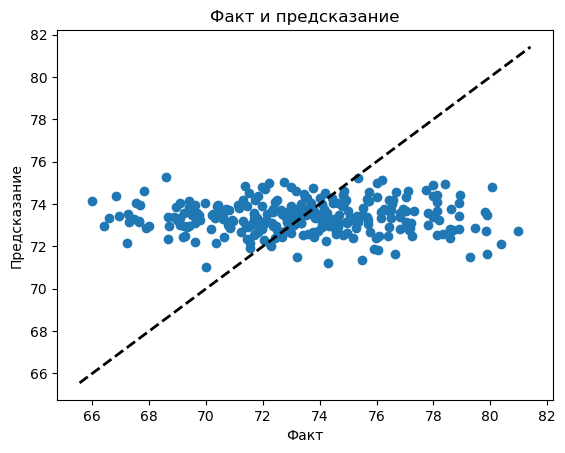

In [54]:
# Подгружаем библиотеку 
from sklearn.ensemble import RandomForestRegressor


# Присвоим значения
X_2 = df_work_norm.drop(['Угол нашивки, град', 'Плотность нашивки'], axis=1)
y_2 = np.array(df_work['Модуль упругости при растяжении, ГПа'])

# Разделение данных на обучающую и тестовую выборки
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

# Создание модели случайного леса
model_2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучение модели
model_2.fit(X_2_train, y_2_train)

# Прогнозирование на тестовой выборке
y_2_pred = model_2.predict(X_2_test)

# Оценка производительности модели
print(f'Коэффициент детерминации: {r2_score(y_2_test, y_2_pred)}')
print (f'Среднее абсолюьное отклонение: {mean_absolute_error(y_2_test, y_2_pred)}')
print (f'Среднее квадротичное отклонение: {mean_squared_error(y_2_test, y_2_pred)}')

# Кросс-валидация
cv_scores = cross_val_score(model_2, X_2, y_2, cv=7, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE Scores: {-cv_scores}')
print(f'Mean CV MSE Score: {-np.mean(cv_scores):.2f}')

# Визуализация предсказанных значений против фактических
plt.scatter(y_2_test, y_2_pred)
plt.xlabel('Факт')
plt.ylabel('Предсказание')
plt.title('Факт и предсказание')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()


## 3 Полиномиальная регрессия

Коэффициент детерминации: -0.06850155385645462
Среднее абсолюьное отклонение: 2.5476455530592474
Среднее квадротичное отклонение: 10.383002000407618
Cross-Validation MSE Scores: [ 9.32751335 10.98510134 10.1147042   8.3508563   9.82048078  9.32137646
  8.55449466]
Mean CV MSE Score: 9.50


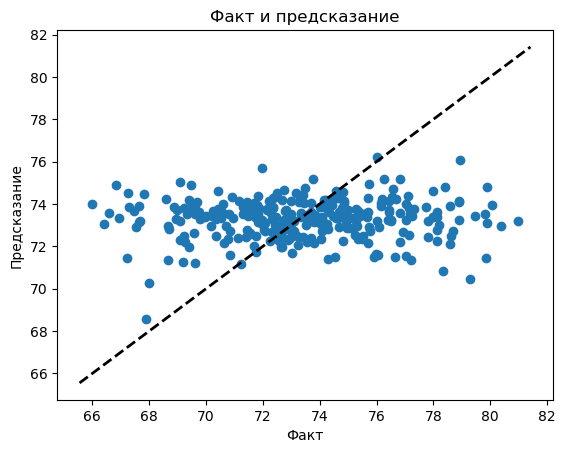

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Присвоим значения
X_3 = df_work_norm.drop(['Угол нашивки, град', 'Плотность нашивки'], axis=1)
y_3 = df_work[['Модуль упругости при растяжении, ГПа']]

# Разделение данных на обучающую и тестовую выборки
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.3, random_state=42)

# Преобразование признаков в полиномиальные
degree = 2  # Степень полинома
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_3_train)
X_poly_test = poly_features.transform(X_3_test)

# Обучение модели линейной регрессии на полиномиальных признаках
model_3 = LinearRegression()
model_3.fit(X_poly_train, y_3_train)

# Предсказание на тестовой выборке
y_3_pred = model_3.predict(X_poly_test)

# Оценка производительности модели
print(f'Коэффициент детерминации: {r2_score(y_3_test, y_3_pred)}')
print (f'Среднее абсолюьное отклонение: {mean_absolute_error(y_3_test, y_3_pred)}')
print (f'Среднее квадротичное отклонение: {mean_squared_error(y_3_test, y_3_pred)}')

# Кросс-валидация
cv_scores = cross_val_score(model_3, X_3, y_3, cv=7, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE Scores: {-cv_scores}')
print(f'Mean CV MSE Score: {-np.mean(cv_scores):.2f}')

# Визуализация предсказанных значений против фактических
plt.scatter(y_3_test, y_3_pred)
plt.xlabel('Факт')
plt.ylabel('Предсказание')
plt.title('Факт и предсказание')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()




## 4 Нейросеть

Epoch 1/30
21/21 [==============================] - 3s 32ms/step - loss: -6.7106 - accuracy: 0.0000e+00 - val_loss: -11.9537 - val_accuracy: 0.0000e+00
Epoch 2/30
21/21 [==============================] - 0s 4ms/step - loss: -17.1904 - accuracy: 0.0000e+00 - val_loss: -24.1884 - val_accuracy: 0.0000e+00
Epoch 3/30
21/21 [==============================] - 0s 4ms/step - loss: -31.8345 - accuracy: 0.0000e+00 - val_loss: -42.3951 - val_accuracy: 0.0000e+00
Epoch 4/30
21/21 [==============================] - 0s 4ms/step - loss: -54.3651 - accuracy: 0.0000e+00 - val_loss: -70.5730 - val_accuracy: 0.0000e+00
Epoch 5/30
21/21 [==============================] - 0s 4ms/step - loss: -88.8451 - accuracy: 0.0000e+00 - val_loss: -113.4911 - val_accuracy: 0.0000e+00
Epoch 6/30
21/21 [==============================] - 0s 4ms/step - loss: -140.5703 - accuracy: 0.0000e+00 - val_loss: -177.0255 - val_accuracy: 0.0000e+00
Epoch 7/30
21/21 [==============================] - 0s 3ms/step - loss: -216.1559 - a

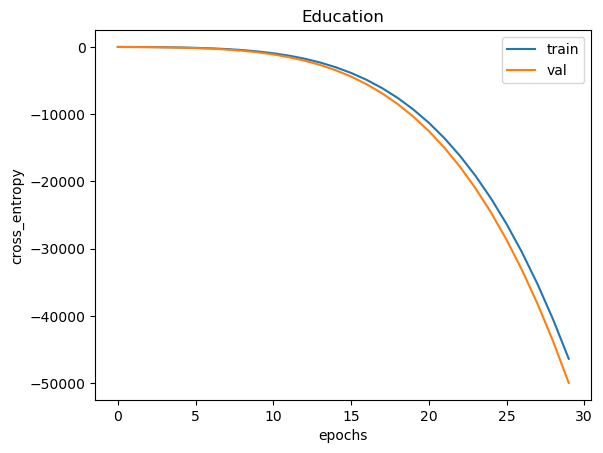

In [56]:
# Загрузим библиотеки 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score


#Разделим данные
# Присвоим значения
X_4 = df_work_norm[['Соотношение матрица-наполнитель']]
y_4 = np.array(df_work['Модуль упругости при растяжении, ГПа'])

# Разделение данных на обучающую и тестовую выборки
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, test_size=0.3, random_state=42)

# Нейронная сеть 
model_4=Sequential()

model_4.add(layers.Dense(13, activation='relu'))
#скрытый слой №1
model_4.add(layers.Dense(10, activation='relu'))
#скрытый слой №2
model_4.add(layers.Dense(10, activation='relu'))
#выходной слой
model_4.add(layers.Dense(1, activation='sigmoid'))

#Компилируем модель
model_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Обучение модели
history=model_4.fit(X_4_train, y_4_train,
             epochs=30,
             batch_size=32,
             verbose=1,
             validation_data=(X_4_test, y_4_test))

#Прогноз
y_4_pred=model_4.predict(X_4_test)

#Описание нейросети
model_4.summary()

#Визулизация
plt.title('Education')
plt.xlabel('epochs')
plt.ylabel('cross_entropy')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.legend()
plt.show()

## Выводы

Все 4-и метода, которые мы использовали не дали положительного результата.
Разведовательный анализ предсказывал данный результат, данные имели облочное распределение
и плохо коррелировали с таргетом. 
Нужно вернуться  к начальному этапу и проветси работу над данными или изменить постоновку задачи. 


D:\Program_mgtu\Anaconda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


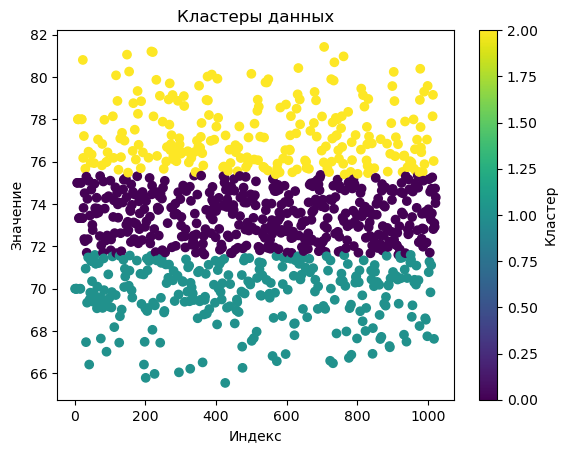

In [282]:

# Возможно, к решению задачи нас приблизит прогноз на интервал значений,
# а следовательно мы можем перейти от задачи регрессии к задаче класификации. 

# 1 Попробуем перейти от задачи регресии к задаче класификации

# Разабьем наш таргет на кластеры, для использования присвоенных класво в обучении  
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Применение K-средних
kmeans = KMeans(n_clusters=3, random_state=42)  # Укажим количество кластеров
df_work['cluster'] = kmeans.fit_predict(df_work[['Модуль упругости при растяжении, ГПа']])

# Визуализация кластеров
plt.scatter(df_work['Модуль упругости при растяжении, ГПа'].index, 
            df_work['Модуль упругости при растяжении, ГПа'], 
            c=df_work['cluster'], cmap='viridis')
plt.title('Кластеры данных')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.colorbar(label='Кластер')
plt.show()


In [317]:
# Разные варинты использования класетров не дают хороший прогноз, попробуем вручную подобрать нтервалы и закодировать их. 
# Закодируем интервалы значений нашего таргета - вручную создадим класс: 

df_work['new Y']=pd.NA
df_work.loc[df_work['Модуль упругости при растяжении, ГПа'] < 72, 'new Y'] = '65-72'
df_work.loc[df_work['Модуль упругости при растяжении, ГПа'] >= 72, 'new Y'] = '72-78'
df_work.loc[df_work['Модуль упругости при растяжении, ГПа'] >= 78, 'new Y'] = '76-82'


#df_work['new Y'] = df_work['new Y'].astype(str)
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 1 to 1022
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       957 non-null    float64
 1   Плотность, кг/м3                      957 non-null    float64
 2   Модуль упругости, ГПа                 957 non-null    float64
 3   Количество отвердителя, м.%           957 non-null    float64
 4   Содержание эпоксидных групп,%_2       957 non-null    float64
 5   Температура вспышки, С_2              957 non-null    float64
 6   Поверхностная плотность, г/м2         957 non-null    float64
 7   Модуль упругости при растяжении, ГПа  957 non-null    float64
 8   Прочность при растяжении, МПа         957 non-null    float64
 9   Потребление смолы, г/м2               957 non-null    float64
 10  Угол нашивки, град                    957 non-null    int64  
 11  Шаг нашивки       

In [339]:
#1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Загружаем набор данных о вине
#X_5 = df_work_norm[['Содержание эпоксидных групп,%_2','Температура вспышки, С_2']]
X_5 = df_work_norm.drop(['Угол нашивки, град', 'Плотность нашивки'], axis=1)
y_5 = np.array(df_work['new Y'])
#y_5 = np.array(df_work['cluster'])

# Разделяем данные на обучающую и тестовую выборки
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5, test_size=0.3, random_state=42)

# Создаем и обучаем модель KNN
model_5 = KNeighborsClassifier(n_neighbors=9)  # Используем 5 ближайших соседей
model_5.fit(X_5_train, y_5_train)

# Делаем предсказания на тестовой выборке
y_5_pred = model_5.predict(X_5_test)

# Оцениваем модель
plt.show()
print("Отчет о классификации:")
print(classification_report(y_5_test, y_5_pred))



Отчет о классификации:
              precision    recall  f1-score   support

       65-72       0.33      0.28      0.30        97
       72-78       0.57      0.72      0.64       166
       76-82       0.00      0.00      0.00        25

    accuracy                           0.51       288
   macro avg       0.30      0.33      0.31       288
weighted avg       0.44      0.51      0.47       288



D:\Program_mgtu\Anaconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program_mgtu\Anaconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program_mgtu\Anaconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [319]:
#input ('Введите параметры )

In [340]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

 
#X_6 = df_work_norm[['Содержание эпоксидных групп,%_2','Температура вспышки, С_2']]
X_6 = df_work_norm.drop(['Угол нашивки, град', 'Плотность нашивки'], axis=1)
#y_6 = np.array(df_work['cluster'])
y_6 = np.array(df_work['new Y'])

# Разделяем данные на обучающую и тестовую выборки
X_6_train, X_6_test, y_6_train, y_6_test = train_test_split(X_6, y_6, test_size=0.3, random_state=42)

# Создаем и обучаем модель случайного леса
model_6 = RandomForestClassifier(n_estimators=1000, random_state=42)
model_6.fit(X_6_train, y_6_train)

# Делаем предсказания
y_6_pred = model_6.predict(X_6_test)

# Оцениваем модель
print("Отчет о классификации:")
print(classification_report(y_6_test, y_6_pred))

Отчет о классификации:
              precision    recall  f1-score   support

       65-72       0.41      0.16      0.24        97
       72-78       0.58      0.87      0.70       166
       76-82       1.00      0.04      0.08        25

    accuracy                           0.56       288
   macro avg       0.66      0.36      0.34       288
weighted avg       0.56      0.56      0.49       288



In [312]:
# Классификация тоже не выявила зависимости между данными, т.к. показатели низкие, 
# а неплохой в целом результтат в интервале 71-78 говорит лишь о том, что большая часть данных поподает в этот интервал, вне
# зависимости от признаков. 
 

In [342]:
# Попробуем варварски обрезать данные 
df_work_del = df_join[(df_join['Модуль упругости при растяжении, ГПа'] >= 70) & (df_join_iqr_7['Модуль упругости при растяжении, ГПа'] <= 78)]

In [343]:
df_work_del.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
index,,,,,,,,,,,,,
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [347]:
df_work['new Y_2']=pd.NA
df_work.loc[df_work['Модуль упругости при растяжении, ГПа'] < 71, 'new Y_2'] = '70-71'
df_work.loc[df_work['Модуль упругости при растяжении, ГПа'] >= 71, 'new Y_2'] = '72-74'
df_work.loc[df_work['Модуль упругости при растяжении, ГПа'] >= 74, 'new Y_2'] = '74-77'
df_work.loc[df_work['Модуль упругости при растяжении, ГПа'] >= 77, 'new Y_2'] = '77-78'

In [348]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

 
#X_7 = df_work_norm[['Содержание эпоксидных групп,%_2','Температура вспышки, С_2']]
X_7 = df_work_norm.drop(['Угол нашивки, град', 'Плотность нашивки'], axis=1)
#y_6 = np.array(df_work['cluster'])
y_7 = np.array(df_work['new Y_2'])

# Разделяем данные на обучающую и тестовую выборки
X_7_train, X_7_test, y_7_train, y_7_test = train_test_split(X_7, y_7, test_size=0.3, random_state=42)

# Создаем и обучаем модель случайного леса
model_7 = RandomForestClassifier(n_estimators=500, random_state=42)
model_7.fit(X_7_train, y_7_train)

# Делаем предсказания
y_7_pred = model_7.predict(X_7_test)

# Оцениваем модель
print("Отчет о классификации:")
print(classification_report(y_7_test, y_7_pred))

Отчет о классификации:
              precision    recall  f1-score   support

       70-71       0.18      0.08      0.11        65
       72-74       0.34      0.56      0.43       102
       74-77       0.25      0.28      0.27        81
       77-78       0.33      0.03      0.05        40

    accuracy                           0.30       288
   macro avg       0.28      0.24      0.21       288
weighted avg       0.28      0.30      0.26       288



In [ ]:
# Таже картина, Рим стоит не смотря на варваров.


## Создадим приложение к лучшей модели

In [350]:
# сохраняем лучшую модель
from joblib import dump, load

dump(model_6, 'best_model_6.joblib')

# сохрнаим в GitHub


['best_model_6.joblib']

In [ ]:
from flask import Flask, request, jsonify

# Инициализация Flask приложения
app = Flask(__name__)

# Загрузка обученной модели
model = load('best_model_6.joblib')



# Запуск приложения
if __name__ == '__main__':
    app.run(debug=True)